<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/ICP07_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is ICP07 for python lession.**

**Created by - Prabhanjan Trivedi**

**Question 1** - Change the classifier in the given code to

a. SVM and see how accuracy changes.

b. change the tfidf vectorizer to use bigram and see how the accuracy changes
TfidfVectorizer

c. Set argument
(ngram_range=(1,2))
stop_words
='english' and see how accuracy changes

In [191]:
#import all important libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC, LinearSVC
from bs4 import BeautifulSoup
import nltk
import urllib.request
from bs4.element import Comment
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import wordpunct_tokenize, pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 
nltk.download('maxent_ne_chunker')
nltk.download('words')
#plotting a graph
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: 
one for training (or development) and the other one for testing (or for performance evaluation).

In [2]:
#Getting training dataset
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [7]:
#Checking type of dataset 
type(twenty_train)

sklearn.utils.Bunch

In [9]:
#Description of Dataset
twenty_train.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total            

In [12]:
#First 5 view of data
twenty_train.data[:5]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [29]:
#Count of X features 
len(twenty_train.data)

11314

In [15]:
#First 5 view of target/ classification in dataset 
twenty_train.target[:5]

array([ 7,  4,  4,  1, 14])

In [16]:
#Target/Classification names in dataset
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
#vectorization 
tfidf_Vect = TfidfVectorizer()
#Converting features/X data into TFIDF features
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)

In [20]:
#Vocab of dataset 
print(tfidf_Vect.vocabulary_)

{'from': 56979, 'lerxst': 75358, 'wam': 123162, 'umd': 118280, 'edu': 50527, 'where': 124031, 'my': 85354, 'thing': 114688, 'subject': 111322, 'what': 123984, 'car': 37780, 'is': 68532, 'this': 114731, 'nntp': 87620, 'posting': 95162, 'host': 64095, 'rac3': 98949, 'organization': 90379, 'university': 118983, 'of': 89362, 'maryland': 79666, 'college': 40998, 'park': 92081, 'lines': 76032, '15': 4605, 'was': 123292, 'wondering': 124931, 'if': 65798, 'anyone': 28615, 'out': 90774, 'there': 114579, 'could': 42876, 'enlighten': 51793, 'me': 80638, 'on': 89860, 'saw': 104813, 'the': 114455, 'other': 90686, 'day': 45295, 'it': 68766, 'door': 48618, 'sports': 109581, 'looked': 76718, 'to': 115475, 'be': 32311, 'late': 74693, '60s': 16574, 'early': 50111, '70s': 18299, 'called': 37433, 'bricklin': 34995, 'doors': 48620, 'were': 123796, 'really': 99822, 'small': 108252, 'in': 66608, 'addition': 26073, 'front': 56989, 'bumper': 35612, 'separate': 106116, 'rest': 101378, 'body': 34181, 'all': 2743

Vocabulary for TFIDF is mapping of terms to feature indices. As per above vocab, we can say that word 'my' has feature or vector of 85354.

In [34]:
# Creating first Model(Given in code) - Naive Bayes
model_nb = MultinomialNB()
#fitting the training data
model_nb.fit(X_train_tfidf, twenty_train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
#Getting test data for prediction
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
#Change test data to TFIDF vector
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

In [36]:
#prediction on NB model
predicted_nb = model_nb.predict(X_test_tfidf)

In [37]:
#Score for NB model
score_nb = metrics.accuracy_score(twenty_test.target, predicted_nb)
print(score_nb)

0.7738980350504514


In [43]:
#Creating second model - SVM model 
model_sv = SVC()
#Fitting the trainig data
model_sv.fit(X_train_tfidf, twenty_train.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#test data is already vectorized
#need to fit in SVM model for prediction
predicted_sv = model_sv.predict(X_test_tfidf)

In [48]:
#Score for SVM model
score_svm = metrics.accuracy_score(twenty_test.target, predicted_sv)
print(score_svm)

0.8186404673393521


Creating TFIDF to use bigram (cosdering two words together).

In [52]:
#vectorization for bigram
tfidf_Vect_2 = TfidfVectorizer(ngram_range=(1,2))
#Converting train features/X data into TFIDF features with bigram
X_train_tfidf_2 = tfidf_Vect_2.fit_transform(twenty_train.data)
#Converting test fratures/X train into TFIDF featurtes with bigram
X_test_tfidf_2 = tfidf_Vect_2.transform(twenty_test.data)

In [51]:
#Creating Nb model to fit bigram TFIDF vectors
model_nb_2 = MultinomialNB()
#fitting the training data
model_nb_2.fit(X_train_tfidf_2, twenty_train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
#prediction on NB model for bigram data
predicted_nb2 = model_nb_2.predict(X_test_tfidf_2)

In [57]:
#Score for NB model with bigram vector
score_nb2 = metrics.accuracy_score(twenty_test.target, predicted_nb2)
print(score_nb2)

0.765400955921402


In [55]:
#Creating second model - SVM model for bigram data
model_sv2 = SVC()
#Fitting the trainig data
model_sv2.fit(X_train_tfidf_2, twenty_train.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
#Need to fit in SVM model for prediction - bigram vector
predicted_sv2 = model_sv2.predict(X_test_tfidf_2)

In [59]:
#Score for SVM model for bigram vector
score_svm2 = metrics.accuracy_score(twenty_test.target, predicted_sv2)
print(score_svm2)

0.8043016463090813


Creating TFIDF to use bigram (cosdering two words together) and stopwords as english.

In [60]:
#vectorization for bigram and using stopwords as english
tfidf_Vect_2_sw = TfidfVectorizer(ngram_range=(1,2),stop_words= 'english' )
#Converting train features/X data into TFIDF features with bigram
X_train_tfidf_2_sw = tfidf_Vect_2_sw.fit_transform(twenty_train.data)
#Converting test fratures/X train into TFIDF featurtes with bigram
X_test_tfidf_2_sw = tfidf_Vect_2_sw.transform(twenty_test.data)

In [62]:
#Creating two models NB and SVM to measure score
model_nb2_sw = MultinomialNB()
model_sv2_sw = SVC()
#fitting the training data in both models
model_nb_2_sw.fit(X_train_tfidf_2_sw, twenty_train.target)
model_sv2_sw.fit(X_train_tfidf_2_sw, twenty_train.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
#prediction for both models
predicted_nb2_sw = model_nb_2_sw.predict(X_test_tfidf_2_sw)
predicted_sv2_sw = model_sv2_sw.predict(X_test_tfidf_2_sw)

In [64]:
#Score for both models
score_nb2_sw = metrics.accuracy_score(twenty_test.target, predicted_nb2_sw)
print('Score for NB model with bigram and stopwords : {}'.format(score_nb2_sw))
score_svm2_sw = metrics.accuracy_score(twenty_test.target, predicted_sv2_sw)
print('Score for SVM model with bigram and stopwords : {}'.format(score_svm2_sw))

Score for NB model with bigram and stopwords : 0.8074880509824748
Score for SVM model with bigram and stopwords : 0.8143919277748274


**Plotting our conlcusion through graph**

In [65]:
#creating a dictionary for score values
score_compare1 = {'NB': score_nb, 'SVM' : score_svm }
score_compare2 = {'NB': score_nb2, 'SVM': score_svm2}
score_compare3 = {'NB': score_nb2_sw, 'SVM': score_svm2_sw}

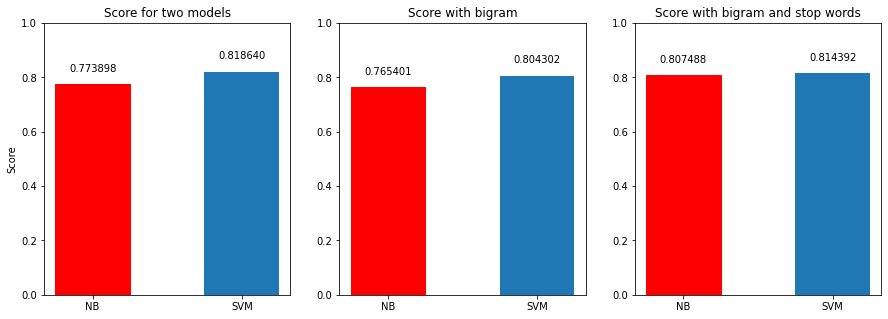

In [94]:
#The below code will create three plots. The parameters that .subplot take are (row, column, no. of plots).
fig= plt.figure(figsize=(15,5))
width = 0.5 # width of the bars


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
#This will create the bar graph for score
ax = plt.subplot(1,3,1)
plt1 = ax.bar(score_compare1.keys(), score_compare1.values(), width)
plt1[0].set_color('r')
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_title('Score for two models')
autolabel(plt1)

#The below code will create the second plot.
ax = plt.subplot(1,3,2)
#This will create the bar graph for score having bigram TFIDF
plt2 = ax.bar(score_compare2.keys(), score_compare2.values(), width)
plt2[0].set_color('r')
ax.set_ylim(0,1)
ax.set_title('Score with bigram')
autolabel(plt2)
#The below code will create the third plot.
ax = plt.subplot(1,3,3)
#This will create the bar graph for score having bigram TFIDF
plt3 = ax.bar(score_compare3.keys(), score_compare3.values(), width)
plt3[0].set_color('r')
ax.set_ylim(0,1)
ax.set_title('Score with bigram and stop words')
autolabel(plt3)
plt.show()

**Question 2 -** Extract the following web URL text using BeautifulSoup
https://en.wikipedia.org/wiki/Google

In [157]:
url = 'https://en.wikipedia.org/wiki/Google'

In [158]:
#Query the website and return the html to the variable 'source_code'
source_code = urllib.request.urlopen(url)

In [159]:
#A function to check tags in html and return boolean 
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

# A function to find text and  parse it accordingly
def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

text = str(text_from_html(source_code))

**Question 3 -** Save it in input.txt

In [160]:
#Saving text in a file
file = open("input.txt","w")#write mode 
file.write(text) 
file.close() 

**Question 4 --** Apply the following on the “input.txt” and show output: 

a. Tokenization

b. POS

c. Stemming

d. Lemmatization

e. Trigram

f. Named Entity Recognition


In [161]:
#opening the file
file = open("input.txt","r")
text =  file.readlines() 
print(text)

['          Google   From Wikipedia, the free encyclopedia     Jump to navigation  Jump to search  This article is about the company. For the search engine, see Google Search . For other uses, see Google (disambiguation) .  Not to be confused with Googol or Goggles .    American technology company    Google, LLC Logo since 2015 [update] Google\'s headquarters, the Googleplex Formerly Google Inc. (1998–2017) Type Limited liability company , Subsidiary Industry Internet Cloud computing Computer software Computer hardware Artificial intelligence Advertising Founded September\xa04, 1998 ; 22\xa0years ago ( 1998-09-04 ) [a] in Menlo Park , California, U.S. Founders Larry Page Sergey Brin Headquarters 1600 Amphitheatre Parkway , Mountain View, California , U.S. Area served Worldwide Key people Sundar Pichai ( CEO ) Ruth Porat ( CFO ) Products List of products Revenue 66,001,000,000 US dollar [5] (2014) Operating income 16,496,000,000 US dollar [5] (2014) Net income 14,444,000,000 United Stat

In [163]:
#tokenization
text_token = nltk.word_tokenize(str(text))
print(text_token)

['[', "'", 'Google', 'From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia', 'Jump', 'to', 'navigation', 'Jump', 'to', 'search', 'This', 'article', 'is', 'about', 'the', 'company', '.', 'For', 'the', 'search', 'engine', ',', 'see', 'Google', 'Search', '.', 'For', 'other', 'uses', ',', 'see', 'Google', '(', 'disambiguation', ')', '.', 'Not', 'to', 'be', 'confused', 'with', 'Googol', 'or', 'Goggles', '.', 'American', 'technology', 'company', 'Google', ',', 'LLC', 'Logo', 'since', '2015', '[', 'update', ']', 'Google\\', "'s", 'headquarters', ',', 'the', 'Googleplex', 'Formerly', 'Google', 'Inc.', '(', '1998–2017', ')', 'Type', 'Limited', 'liability', 'company', ',', 'Subsidiary', 'Industry', 'Internet', 'Cloud', 'computing', 'Computer', 'software', 'Computer', 'hardware', 'Artificial', 'intelligence', 'Advertising', 'Founded', 'September\\xa04', ',', '1998', ';', '22\\xa0years', 'ago', '(', '1998-09-04', ')', '[', 'a', ']', 'in', 'Menlo', 'Park', ',', 'California', ',', 'U.S', '.', 'Foun

In [166]:
#Pos
text_pos = nltk.pos_tag(text_token)
print(text_pos)

[('[', 'NN'), ("'", "''"), ('Google', 'NNP'), ('From', 'NNP'), ('Wikipedia', 'NNP'), (',', ','), ('the', 'DT'), ('free', 'JJ'), ('encyclopedia', 'NN'), ('Jump', 'NNP'), ('to', 'TO'), ('navigation', 'VB'), ('Jump', 'NNP'), ('to', 'TO'), ('search', 'VB'), ('This', 'DT'), ('article', 'NN'), ('is', 'VBZ'), ('about', 'IN'), ('the', 'DT'), ('company', 'NN'), ('.', '.'), ('For', 'IN'), ('the', 'DT'), ('search', 'NN'), ('engine', 'NN'), (',', ','), ('see', 'VBP'), ('Google', 'NNP'), ('Search', 'NNP'), ('.', '.'), ('For', 'IN'), ('other', 'JJ'), ('uses', 'NNS'), (',', ','), ('see', 'VBP'), ('Google', 'NNP'), ('(', '('), ('disambiguation', 'NN'), (')', ')'), ('.', '.'), ('Not', 'RB'), ('to', 'TO'), ('be', 'VB'), ('confused', 'VBN'), ('with', 'IN'), ('Googol', 'NNP'), ('or', 'CC'), ('Goggles', 'NNP'), ('.', '.'), ('American', 'NNP'), ('technology', 'NN'), ('company', 'NN'), ('Google', 'NNP'), (',', ','), ('LLC', 'NNP'), ('Logo', 'NNP'), ('since', 'IN'), ('2015', 'CD'), ('[', 'NNP'), ('update', 'J

In [175]:
#All 3 different stemming
#porter Stemmer
pStemmer = PorterStemmer()
print('Porter Stemming')
print(pStemmer.stem(str(text_pos)))
#Lancaster Stemmer
lStemmer = LancasterStemmer()
print('Lancaster Stemming')
print(lStemmer.stem(str(text_pos)))
#Snowball Stemmer
sStemmer = SnowballStemmer('english')
print('Snowball Stemming')
print(sStemmer.stem(str(text_pos)))


Porter Stemming
[('[', 'nn'), ("'", "''"), ('google', 'nnp'), ('from', 'nnp'), ('wikipedia', 'nnp'), (',', ','), ('the', 'dt'), ('free', 'jj'), ('encyclopedia', 'nn'), ('jump', 'nnp'), ('to', 'to'), ('navigation', 'vb'), ('jump', 'nnp'), ('to', 'to'), ('search', 'vb'), ('this', 'dt'), ('article', 'nn'), ('is', 'vbz'), ('about', 'in'), ('the', 'dt'), ('company', 'nn'), ('.', '.'), ('for', 'in'), ('the', 'dt'), ('search', 'nn'), ('engine', 'nn'), (',', ','), ('see', 'vbp'), ('google', 'nnp'), ('search', 'nnp'), ('.', '.'), ('for', 'in'), ('other', 'jj'), ('uses', 'nns'), (',', ','), ('see', 'vbp'), ('google', 'nnp'), ('(', '('), ('disambiguation', 'nn'), (')', ')'), ('.', '.'), ('not', 'rb'), ('to', 'to'), ('be', 'vb'), ('confused', 'vbn'), ('with', 'in'), ('googol', 'nnp'), ('or', 'cc'), ('goggles', 'nnp'), ('.', '.'), ('american', 'nnp'), ('technology', 'nn'), ('company', 'nn'), ('google', 'nnp'), (',', ','), ('llc', 'nnp'), ('logo', 'nnp'), ('since', 'in'), ('2015', 'cd'), ('[', 'nnp'

In [178]:
#Lemmatization 
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize(str(text_pos)))

[('[', 'NN'), ("'", "''"), ('Google', 'NNP'), ('From', 'NNP'), ('Wikipedia', 'NNP'), (',', ','), ('the', 'DT'), ('free', 'JJ'), ('encyclopedia', 'NN'), ('Jump', 'NNP'), ('to', 'TO'), ('navigation', 'VB'), ('Jump', 'NNP'), ('to', 'TO'), ('search', 'VB'), ('This', 'DT'), ('article', 'NN'), ('is', 'VBZ'), ('about', 'IN'), ('the', 'DT'), ('company', 'NN'), ('.', '.'), ('For', 'IN'), ('the', 'DT'), ('search', 'NN'), ('engine', 'NN'), (',', ','), ('see', 'VBP'), ('Google', 'NNP'), ('Search', 'NNP'), ('.', '.'), ('For', 'IN'), ('other', 'JJ'), ('uses', 'NNS'), (',', ','), ('see', 'VBP'), ('Google', 'NNP'), ('(', '('), ('disambiguation', 'NN'), (')', ')'), ('.', '.'), ('Not', 'RB'), ('to', 'TO'), ('be', 'VB'), ('confused', 'VBN'), ('with', 'IN'), ('Googol', 'NNP'), ('or', 'CC'), ('Goggles', 'NNP'), ('.', '.'), ('American', 'NNP'), ('technology', 'NN'), ('company', 'NN'), ('Google', 'NNP'), (',', ','), ('LLC', 'NNP'), ('Logo', 'NNP'), ('since', 'IN'), ('2015', 'CD'), ('[', 'NNP'), ('update', 'J

In [184]:
#trigram 
trigram = ngrams(text_token, 3)
print(list(trigram))

[('[', "'", 'Google'), ("'", 'Google', 'From'), ('Google', 'From', 'Wikipedia'), ('From', 'Wikipedia', ','), ('Wikipedia', ',', 'the'), (',', 'the', 'free'), ('the', 'free', 'encyclopedia'), ('free', 'encyclopedia', 'Jump'), ('encyclopedia', 'Jump', 'to'), ('Jump', 'to', 'navigation'), ('to', 'navigation', 'Jump'), ('navigation', 'Jump', 'to'), ('Jump', 'to', 'search'), ('to', 'search', 'This'), ('search', 'This', 'article'), ('This', 'article', 'is'), ('article', 'is', 'about'), ('is', 'about', 'the'), ('about', 'the', 'company'), ('the', 'company', '.'), ('company', '.', 'For'), ('.', 'For', 'the'), ('For', 'the', 'search'), ('the', 'search', 'engine'), ('search', 'engine', ','), ('engine', ',', 'see'), (',', 'see', 'Google'), ('see', 'Google', 'Search'), ('Google', 'Search', '.'), ('Search', '.', 'For'), ('.', 'For', 'other'), ('For', 'other', 'uses'), ('other', 'uses', ','), ('uses', ',', 'see'), (',', 'see', 'Google'), ('see', 'Google', '('), ('Google', '(', 'disambiguation'), ('(

In [192]:
#Named Entity Recognition
print(ne_chunk(pos_tag(wordpunct_tokenize(str(text)))))

(S
  ['/JJ
  Google/NNP
  From/NNP
  Wikipedia/NNP
  ,/,
  the/DT
  free/JJ
  encyclopedia/NN
  (PERSON Jump/NNP)
  to/TO
  navigation/VB
  (PERSON Jump/NNP)
  to/TO
  search/VB
  This/DT
  article/NN
  is/VBZ
  about/IN
  the/DT
  company/NN
  ./.
  For/IN
  the/DT
  search/NN
  engine/NN
  ,/,
  see/VBP
  (PERSON Google/NNP Search/NNP)
  ./.
  For/IN
  other/JJ
  uses/NNS
  ,/,
  see/VBP
  (GPE Google/NNP)
  (/(
  disambiguation/NN
  )/)
  ./.
  Not/RB
  to/TO
  be/VB
  confused/VBN
  with/IN
  (PERSON Googol/NNP)
  or/CC
  (PERSON Goggles/NNP)
  ./.
  (GPE American/NNP)
  technology/NN
  company/NN
  (PERSON Google/NNP)
  ,/,
  (ORGANIZATION LLC/NNP Logo/NNP)
  since/IN
  2015/CD
  [/NNP
  update/JJ
  ]/NNP
  Google/NNP
  \'/NNP
  s/NN
  headquarters/NN
  ,/,
  the/DT
  (ORGANIZATION Googleplex/NNP Formerly/NNP Google/NNP Inc/NNP)
  ./.
  (/(
  1998/CD
  –/IN
  2017/CD
  )/)
  (PERSON Type/NNP Limited/NNP)
  liability/NN
  company/NN
  ,/,
  (PERSON Subsidiary/NNP Industry/NNP)
  In